# Digit Recognition Simple Convolution Neural Network

In [4]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
from PIL import Image
import random

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

## How the MNIST images look like

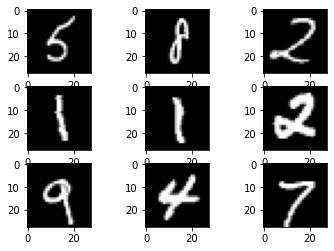

In [10]:
# plot some random images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[random.randint(0,59999)], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

In [16]:
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

## Building the model

In [12]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dropout (Dropout)           (None, 1600)              0

2021-11-29 18:50:52.779404: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-29 18:50:52.779426: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-29 18:50:52.779438: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sak-Ubuntu): /proc/driver/nvidia/version does not exist
2021-11-29 18:50:52.779626: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 10s 23ms/step - loss: 0.3666 - accuracy: 0.8904 - val_loss: 0.0835 - val_accuracy: 0.9778
Epoch 2/15
422/422 [==============================] - 10s 23ms/step - loss: 0.1122 - accuracy: 0.9656 - val_loss: 0.0585 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 13s 31ms/step - loss: 0.0821 - accuracy: 0.9749 - val_loss: 0.0449 - val_accuracy: 0.9868
Epoch 4/15
422/422 [==============================] - 12s 29ms/step - loss: 0.0687 - accuracy: 0.9783 - val_loss: 0.0392 - val_accuracy: 0.9895
Epoch 5/15
422/422 [==============================] - 12s 28ms/step - loss: 0.0613 - accuracy: 0.9808 - val_loss: 0.0419 - val_accuracy: 0.9873
Epoch 6/15
422/422 [==============================] - 13s 30ms/step - loss: 0.0545 - accuracy: 0.9833 - val_loss: 0.0366 - val_accuracy: 0.9902
Epoch 7/15
422/422 [==============================] - 14s 33ms/step - loss: 0.0501 - accuracy: 0.9841 - val_loss: 0.0321 - val_accuracy:

## Model Performance on the Testing Set

In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.024136245250701904
Test accuracy: 0.991599977016449


## Test on Custom Image

In [19]:
image_file = Image.open("img.jpg") # open colour image

newsize = (28,28)
image_file = image_file.resize(newsize)

image_file = image_file.convert('L') # convert image to black and white

image_file.save('result.png')
a = np.asarray(image_file)
#print(a.shape)

x_predict=np.zeros((1,28,28))
#x_predict[0]=a
#print(x_predict.shape)

for x in range(0,27):
    for y in range(0,27):
        x_predict[0][x][y]=a[x][y]/255
        #x_predict[0][x][y]=x_train[1][x][y]
        #print(str(a[x][y])+' - '+str(x_predict[0][x][y]))

print( model.predict(x_predict),'\n',np.argmax( model.predict(x_predict) ) )

[[5.7532285e-05 2.3496631e-04 9.9955970e-01 7.5815215e-06 1.8489941e-07
  1.3453006e-08 5.7715282e-05 3.6934413e-08 8.2263257e-05 3.2620250e-08]] 
 2
